In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import yfinance as yf

In [ ]:
start = '2015-01-01'
end = '2025-06-05'
stock = 'TCS.NS'

data = yf.download(stock,start,end)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [ ]:
data.reset_index(inplace=True)
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
0,2015-01-01,1037.727417,1046.471776,1035.872529,1046.471776,366830
1,2015-01-02,1051.547363,1056.235492,1039.786334,1039.949359,925740
2,2015-01-05,1035.567017,1059.884100,1029.207427,1052.179301,1754242
3,2015-01-06,997.389038,1031.021259,994.698421,1031.021259,2423784
4,2015-01-07,985.607727,1010.658622,981.429177,1006.928542,2636332
...,...,...,...,...,...,...
2567,2025-05-29,3467.281738,3501.378577,3455.783838,3473.823447,3188072
2568,2025-05-30,3432.887207,3475.805781,3422.678144,3459.252957,3404365
2569,2025-06-02,3419.407227,3429.517316,3388.482148,3419.605416,1877585


In [ ]:
ma_100days = data.Close.rolling(100).mean()

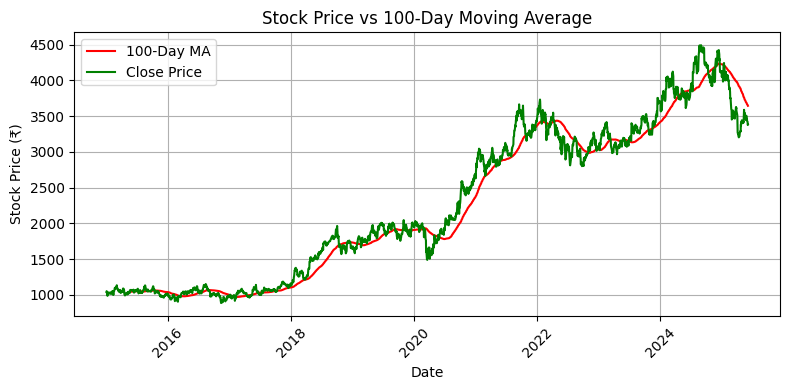

In [ ]:
plt.figure(figsize=(8, 4))

# Plotting with 'Date' as X-axis
plt.plot(data['Date'], ma_100days, 'r', label='100-Day MA')
plt.plot(data['Date'], data['Close'], 'g', label='Close Price')

# Labels, legend, and formatting
plt.xlabel("Date")
plt.ylabel("Stock Price (₹)")
plt.title("Stock Price vs 100-Day Moving Average")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [ ]:
data.dropna(inplace=True)

In [ ]:
data_train = data.Close[0:int(len(data)*0.80)]         # First 80% for training
data_test = data.Close[int(len(data)*0.80):len(data)]  # Last 20% for testing


In [ ]:
data_train.shape , data_test.shape

((2057, 1), (515, 1))

In [ ]:
split = int(len(data) * 0.8)  # define split index
data_train = data['Close'][:split].values.reshape(-1, 1)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
data_train_scaled = scaler.fit_transform(data_train)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))  # output layer

model.compile(optimizer='adam', loss='mean_squared_error')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 8s 145ms/step - loss: 0.1470
Epoch 2/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 0.0168
Epoch 3/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 0.0083
Epoch 4/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - loss: 0.0061
Epoch 5/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 128ms/step - loss: 0.0051
Epoch 6/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 148ms/step - loss: 0.0059
Epoch 7/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 0.0053
Epoch 8/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - loss: 0.0051
Epoch 9/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 0.0046
Epoch 10/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - loss: 0.0044


In [ ]:
data_test = data['Close'][split:].values.reshape(-1, 1)  # test data (last 20%)
data_test_scaled = scaler.transform(data_test)  # use existing scaler

X_test = []
y_test = []

for i in range(time_step, len(data_test_scaled)):
    X_test.append(data_test_scaled[i-time_step:i])
    y_test.append(data_test_scaled[i])

X_test, y_test = np.array(X_test), np.array(y_test)
X_test = X_test.astype(np.float32)
y_test = y_test.astype(np.float32)


In [ ]:
y_pred_scaled = model.predict(X_test)  # predictions are scaled


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step


In [ ]:
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_actual = scaler.inverse_transform(y_test)


In [ ]:
import numpy as np
rmse = np.sqrt(np.mean((y_pred - y_test_actual)**2))
print(f"Root Mean Squared Error: {rmse}")


Root Mean Squared Error: 171.53810119628906


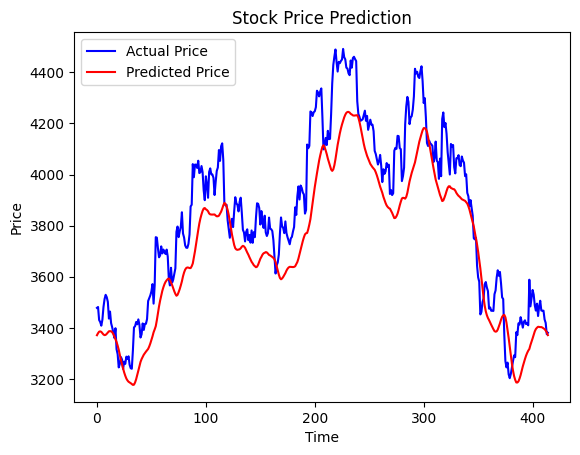

In [ ]:
import matplotlib.pyplot as plt

plt.plot(y_test_actual, color='blue', label='Actual Price')
plt.plot(y_pred, color='red', label='Predicted Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


In [ ]:
model.save('Stock Predictions.keras')

In [ ]:
app_code = '''import numpy as np
import pandas as pd
import yfinance as yf
import streamlit as st
import matplotlib.pyplot as plt
from keras.models import load_model
from sklearn.preprocessing import MinMaxScaler

# Streamlit UI
st.set_page_config(layout="centered")
st.title('📈 Stock Market Predictor using LSTM')

# User input
stock = st.text_input('Enter Stock Symbol (e.g., INFY.NS, TCS.NS, RELIANCE.NS)', 'TCS.NS')
start = '2015-01-01'
end = '2025-06-05'

# Load model (make sure you renamed it without spaces)
try:
    model = load_model('/content/Stock Predictions.keras')
except Exception as e:
    st.error(f"❌ Could not load model: {e}")
    st.stop()

if st.button('Predict'):
    # Fetch data
    try:
        data = yf.download(stock, start, end)
        if data.empty:
            st.error("No data found for this stock symbol.")
            st.stop()
    except:
        st.error("Failed to fetch stock data.")
        st.stop()

    st.subheader('📊 Recent Stock Data')
    st.write(data.tail())

    # Moving Averages
    ma_50 = data['Close'].rolling(50).mean()
    ma_100 = data['Close'].rolling(100).mean()
    ma_200 = data['Close'].rolling(200).mean()

    st.subheader('Price with Moving Averages')
    fig1 = plt.figure(figsize=(10, 5))
    plt.plot(data['Close'], label='Close Price', color='green')
    plt.plot(ma_50, label='MA50', color='red')
    plt.plot(ma_100, label='MA100', color='blue')
    plt.plot(ma_200, label='MA200', color='orange')
    plt.legend()
    plt.xlabel("Date")
    plt.ylabel("Price")
    st.pyplot(fig1)

    # Prepare training/test data
    data_train = pd.DataFrame(data['Close'][0:int(len(data)*0.80)])
    data_test = pd.DataFrame(data['Close'][int(len(data)*0.80):])

    scaler = MinMaxScaler(feature_range=(0,1))
    past_100_days = data_train.tail(100)
    final_test_data = pd.concat([past_100_days, data_test], ignore_index=True)
    final_test_scaled = scaler.fit_transform(final_test_data)

    X_test = []
    y_test = []

    for i in range(100, final_test_scaled.shape[0]):
        X_test.append(final_test_scaled[i-100:i])
        y_test.append(final_test_scaled[i, 0])

    X_test = np.array(X_test)
    y_test = np.array(y_test)

    # Predict
    predictions = model.predict(X_test)
    scale_factor = 1 / scaler.scale_[0]
    predictions = predictions * scale_factor
    y_test = y_test * scale_factor

    # Plot predictions
    st.subheader("📈 Actual vs Predicted Prices")
    fig2 = plt.figure(figsize=(10, 5))
    plt.plot(y_test, color='green', label='Actual Price')
    plt.plot(predictions, color='red', label='Predicted Price')
    plt.xlabel("Time")
    plt.ylabel("Stock Price")
    plt.legend()
    st.pyplot(fig2)

    st.success("✅ Prediction complete.")
'''

# Save it as app.py in /content (default working dir in Colab)
with open("/content/app.py", "w") as f:
    f.write(app_code)


In [ ]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 41.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 86.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.8 MB/s eta 0:00:00


In [ ]:
import streamlit as st

In [ ]:
!pip install pyngrok

In [ ]:
!pkill ngrok
!pkill streamlit

In [ ]:
!ngrok config add-authtoken $auth_token

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
import os
import time
from pyngrok import ngrok

# Run Streamlit
os.system("streamlit run app.py &")
time.sleep(5)  # give time for Streamlit to start

# Open ngrok tunnel
public_url = ngrok.connect(8501)
print("✅ Your app is live at:", public_url)


✅ Your app is live at: NgrokTunnel: "https://2b98-34-127-70-73.ngrok-free.app" -> "http://localhost:8501"
